In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,text,sentiment
0,TRAIN_00000,@SenWarren The problem with your massively fla...,2
1,TRAIN_00001,#Tweetlord is a twitter role playing game! Che...,1
2,TRAIN_00002,"I just slammed my elbow into a fridge, I did n...",2
3,TRAIN_00003,_beckett Thanks so much !,1
4,TRAIN_00004,My gauge fell out on superman,2


In [5]:
print(len(train_data))

32000


In [6]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,text
0,TEST_00000,@naima @dialogician Most of this footage is fr...
1,TEST_00001,@Haggis_UK @kevinhollinrake is willing to brea...
2,TEST_00002,‘No Magic Bullet’ for Preserving Abortion Acce...
3,TEST_00003,Can I also have a swirly flat white?
4,TEST_00004,Question: If the trains we have get disabled i...


In [7]:
print(len(test_data))

48000


In [8]:
# Check the unique values and their counts in the sentiment column
sentiment_counts = train_data['sentiment'].value_counts()
sentiment_counts

2    20095
1     8049
0     3856
Name: sentiment, dtype: int64

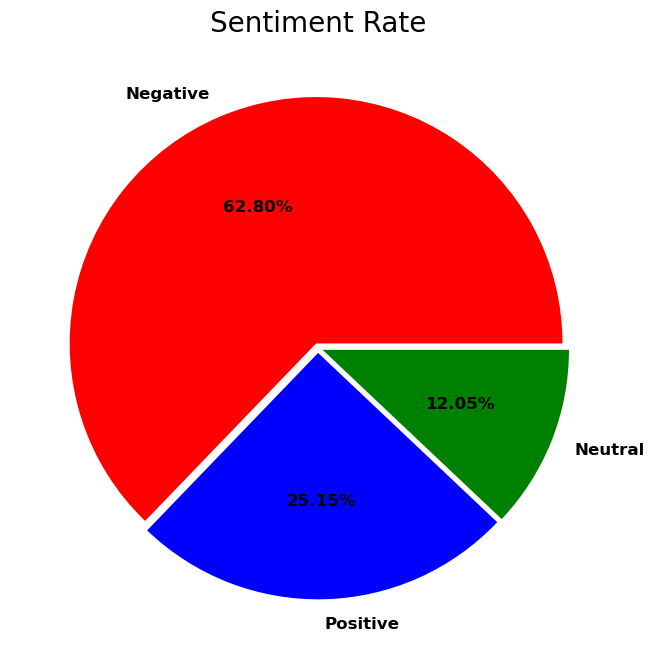

In [9]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(8,8))
plt.title('Sentiment Rate', fontsize=20)

# Create the pie chart
pie = sentiment_counts.plot.pie(autopct='%1.2f%%', 
                                explode=[0.02, 0.02, 0.02], 
                                colors=['red', 'blue', 'green'], 
                                labels=['Negative', 'Positive', 'Neutral'], 
                                textprops={'fontsize': 12, 'weight': 'bold'})
plt.ylabel('')  # Remove the default y-label
plt.show()


In [10]:
def getLength(string):
    if str(type(string)) == "<class 'str'>":
        return len(string)
    else:
        return 0

In [11]:
text_length = train_data['text'].apply(lambda x: getLength(x))

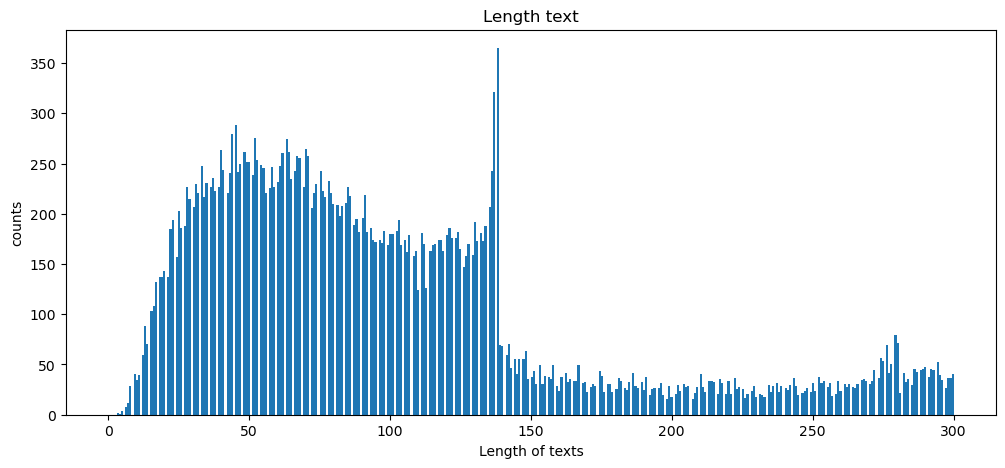

In [12]:
plt.figure(figsize=(12,5))

plt.title('Length text')
plt.ylabel('counts')
plt.xlabel('Length of texts')

hist = plt.hist(text_length, bins=400, range=[0,300])

### 데이터 전처리

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daehyunkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stops = set(stopwords.words('english'))

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from html import unescape

import re

In [17]:
# 'text' 열의 데이터를 선택
train = train_data['text'].str.cat(sep=' ')  # 모든 행의 'text' 데이터를 하나의 문자열로 결합

# HTML 엔터티 제거
train = unescape(train)

# @와 기타 특수 기호 제거
train = re.sub(r'\W*\b\w{1,2}\b', '', train)  # @mention 제거
train = re.sub(r'[^\w\s]', '', train)  # 특수 기호 제거 (알파벳, 숫자, 공백을 제외한 모든 문자 제거)

stop_words = set(stopwords.words('english'))

word_tokens_train = word_tokenize(train)

result = []
for word in word_tokens_train:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :', word_tokens_train[:10], "...", len(word_tokens_train), "words total")
print('불용어 제거 후 :', result[:10], "...", len(result), "words total")

불용어 제거 전 : ['SenWarren', 'The', 'problem', 'with', 'your', 'massively', 'flawed', 'argument', 'one', 'guns'] ... 435234 words total
불용어 제거 후 : ['SenWarren', 'The', 'problem', 'massively', 'flawed', 'argument', 'one', 'guns', 'right', 'constitutionbill'] ... 317227 words total


In [18]:
from collections import Counter

def top_20_train(word_tokens_train):
    token_counts = Counter(word_tokens_train)
    top_20_words = token_counts.most_common(20)
    return top_20_words

print(top_20_train(result))

[('like', 1961), ('get', 1781), ('The', 1396), ('good', 1367), ('one', 1308), ('bad', 1262), ('know', 1207), ('day', 1199), ('got', 1191), ('time', 1144), ('work', 1095), ('think', 1079), ('people', 1052), ('today', 1024), ('going', 1019), ('really', 1014), ('want', 992), ('wrong', 928), ('back', 926), ('see', 919)]


In [19]:
# 필터링 되었는지 확인
word_tokens_train[0:10]

['SenWarren',
 'The',
 'problem',
 'with',
 'your',
 'massively',
 'flawed',
 'argument',
 'one',
 'guns']

In [20]:
# 불용어 여기에 추가 하시면 됩니다.
additional_stopwords = ["The", "one", "day", "https"] # test
stop_words.update(additional_stopwords)

# train 데이터 토큰화 및 불용어 제거
word_tokens_train = word_tokenize(train)
filtered_train = [word for word in word_tokens_train if word not in stop_words]

In [21]:
positive_texts = train_data[train_data['sentiment'] == 1]['text']

# 모든 텍스트를 하나의 문자열로 합치기
pos_String = ' '.join(positive_texts)

In [22]:
negative_texts = train_data[train_data['sentiment'] == 2]['text']

# 모든 텍스트를 하나의 문자열로 합치기
neg_String = ' '.join(negative_texts)

In [23]:
neutral_texts = train_data[train_data['sentiment'] == 0]['text']

# 모든 텍스트를 하나의 문자열로 합치기
neu_String = ' '.join(neutral_texts)

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud

In [26]:
pos_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='BuGn').generate(pos_String)

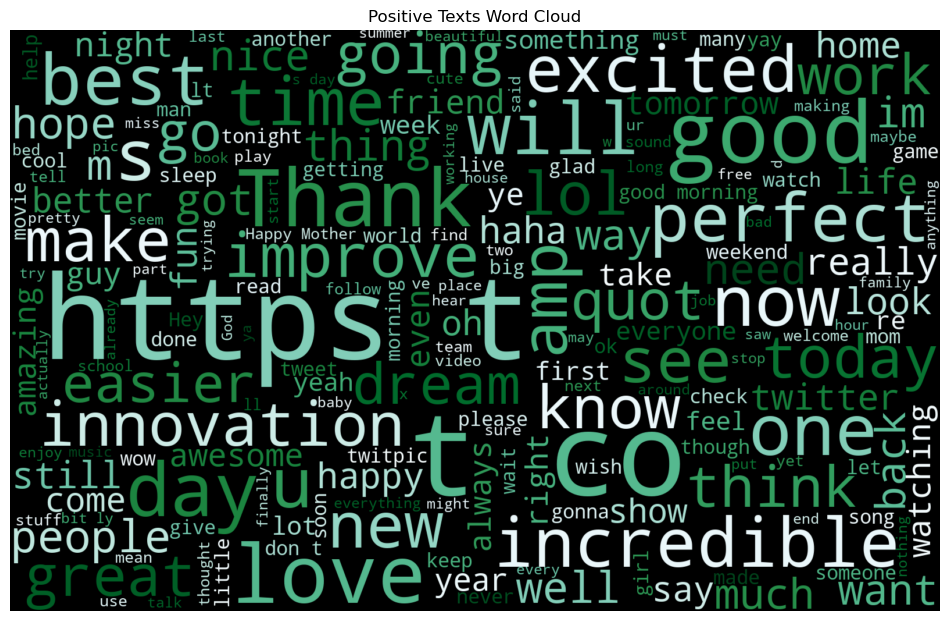

In [27]:
plt.figure(figsize=(12,10))

plt.title('Positive Texts Word Cloud')

plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
neg_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='OrRd').generate(neg_String)

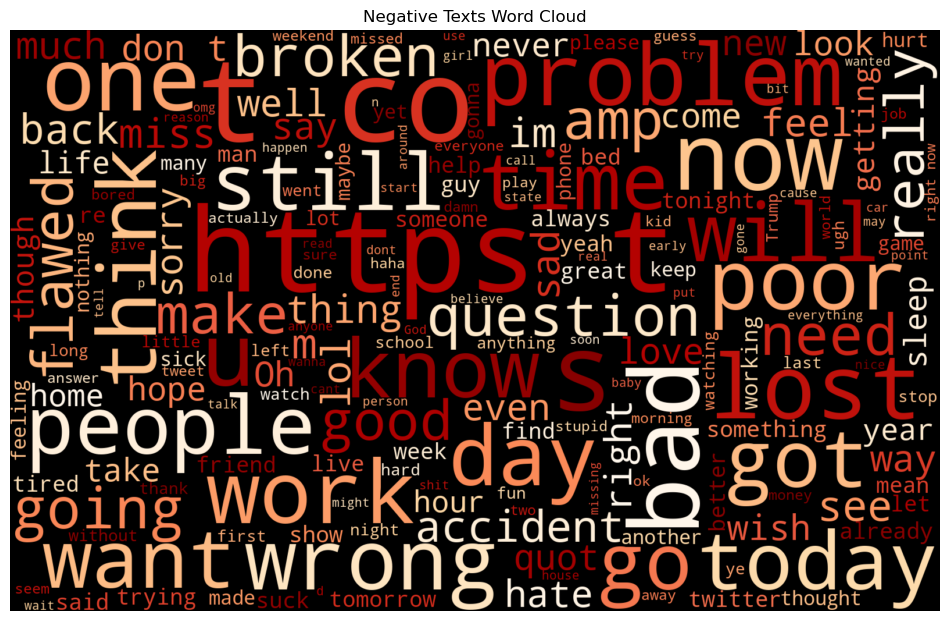

In [29]:
plt.figure(figsize=(12,10))

plt.title('Negative Texts Word Cloud')

plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
neu_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='gray').generate(neu_String)

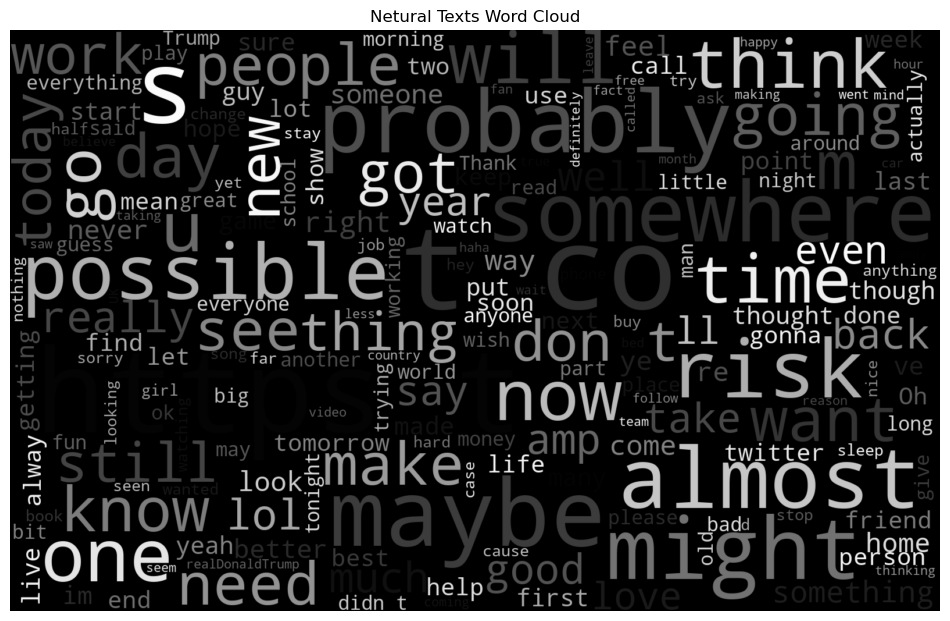

In [31]:
plt.figure(figsize=(12,10))

plt.title('Netural Texts Word Cloud')

plt.imshow(neu_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
# 32,000개
print(len(positive_texts))
print(len(negative_texts))
print(len(neutral_texts))

8049
20095
3856


### Model

In [33]:
import numpy as np

In [34]:
# 전처리한 데이터 통합
texts = positive_texts + negative_texts + neutral_texts
labels = [0] * len(positive_texts) + [1] * len(negative_texts) + [2] * len(neutral_texts)

In [36]:
print(len(texts))
print(len(labels))

32000
32000


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
# Scikit-learn 이용해서 학습, 테스트 데이터 분할
# 데이터를 훈련 세트와 검증 세트로 분할
train_input, test_input, train_target, test_target = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

In [42]:
# Tf-idf-Vectorizer 사용해서 텍스트 데이터를 수치 벡터로 변환

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
train_features = vectorizer.fit_transform(train_input)
test_features = vectorizer.transform(test_input)


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [359]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.87109375
0.80484375


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [360]:
from sklearn.metrics import accuracy_score

predictions = lr.predict(X_test)
# 모델 성능 평가
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.80484375
              precision    recall  f1-score   support

           0       0.84      0.50      0.63       781
           1       0.78      0.63      0.70      1624
           2       0.81      0.94      0.87      3995

    accuracy                           0.80      6400
   macro avg       0.81      0.69      0.73      6400
weighted avg       0.81      0.80      0.79      6400



In [361]:
X_train = train_data['text']
y_train = train_data['sentiment']

X_test = test_data['text']

In [364]:
test_data[['id', 'sentiment']].to_csv('submission1.csv', index=False)

KeyError: "['sentiment'] not in index"